# HW 8

This assignment covers all fundamental concepts required for completing a project

**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**
  * **Q** - QUESTION
  * **A** - Where to input your answer

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook. 
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom.
* Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. One of the objectives of this assignment is to help you learn python and scikit-learn package. 
* See [README.md](README.md) for homework submission instructions

## Related Tutorials

### Refreshers
* [Intro to Machine Learning w scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)
* [A tutorial on statistical-learning for scientific data processing](https://scikit-learn.org/stable/tutorial/statistical_inference/index.html#stat-learn-tut-index)
 
### Classification Approaches
* [Logistic Regression with Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [KNN with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [Support Vector machine example](https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py)
* [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC)
* [Bagging Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
* [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
  
### Modeling   
* [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)
* [Plot Confursion Matrix with Sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
* [Confusion Matrix Display](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics)

# Import all required library 

In [325]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
import json
import lightgbm as lgbm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

# Data Processing

**Q1** Get training data from the dataframe
1. Load ```HW8_data.csv``` from ```data``` folder into data frame
2. Print the head of the dataframe
3. Print the shape of the dataframe
4. Print the description of the dataframe
5. Assign ```Cover_Type``` values to Y
6. Assign rest of the column values to X

**A1** Fill the cell blocks below, Create new cell as per your necessary

In [326]:
data = pd.read_csv(r"C:\Users\antho\Documents\GitHub\alm448\HW\Data\HW8Data\HW8_data.csv")
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3080,137,18,166,1,1009,250,198,166,3635,...,0,0,0,0,0,0,0,0,0,1
1,2758,19,8,551,49,1766,225,231,124,1648,...,0,0,0,0,0,0,0,0,0,2
2,2779,86,9,43,-10,3889,155,204,123,364,...,0,0,0,0,0,0,1,0,0,2
3,2811,296,0,287,4,788,191,226,113,144,...,0,0,0,0,0,0,0,0,0,2
4,2956,314,26,71,22,2910,230,200,99,743,...,0,0,0,0,0,0,1,0,0,2


In [327]:
print(data.shape)
data.describe()

(80000, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,2981.434325,151.634175,15.093913,271.564212,51.510737,1770.080712,211.781612,221.069125,140.711750,1577.937550,...,0.038150,0.037687,0.011838,0.015425,0.010812,0.012538,0.040325,0.039163,0.030437,1.770725
std,287.972764,109.945631,8.531364,227.532197,68.091489,1318.661060,30.814815,22.191030,43.859689,1126.514346,...,0.191559,0.190441,0.108155,0.123237,0.103420,0.111268,0.196722,0.193983,0.171789,0.892577
min,1813.000000,-29.000000,-3.000000,-43.000000,-276.000000,-238.000000,10.000000,69.000000,-48.000000,-218.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2762.000000,60.000000,9.000000,111.000000,4.000000,821.000000,198.000000,210.000000,115.000000,781.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2967.000000,122.000000,14.000000,212.000000,31.000000,1440.000000,218.000000,224.000000,142.000000,1361.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3217.000000,246.000000,20.000000,361.000000,78.000000,2366.000000,233.000000,237.000000,169.000000,2083.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,4271.000000,400.000000,61.000000,1544.000000,562.000000,7604.000000,293.000000,264.000000,268.000000,8011.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [328]:
y= data['Cover_Type']
data.drop(columns= 'Cover_Type')
x= data
labels= x.columns.values

In [329]:
print(y.shape, x.shape)
print(labels)

(80000,) (80000, 55)
['Elevation' 'Aspect' 'Slope' 'Horizontal_Distance_To_Hydrology'
 'Vertical_Distance_To_Hydrology' 'Horizontal_Distance_To_Roadways'
 'Hillshade_9am' 'Hillshade_Noon' 'Hillshade_3pm'
 'Horizontal_Distance_To_Fire_Points' 'Wilderness_Area1'
 'Wilderness_Area2' 'Wilderness_Area3' 'Wilderness_Area4' 'Soil_Type1'
 'Soil_Type2' 'Soil_Type3' 'Soil_Type4' 'Soil_Type5' 'Soil_Type6'
 'Soil_Type7' 'Soil_Type8' 'Soil_Type9' 'Soil_Type10' 'Soil_Type11'
 'Soil_Type12' 'Soil_Type13' 'Soil_Type14' 'Soil_Type15' 'Soil_Type16'
 'Soil_Type17' 'Soil_Type18' 'Soil_Type19' 'Soil_Type20' 'Soil_Type21'
 'Soil_Type22' 'Soil_Type23' 'Soil_Type24' 'Soil_Type25' 'Soil_Type26'
 'Soil_Type27' 'Soil_Type28' 'Soil_Type29' 'Soil_Type30' 'Soil_Type31'
 'Soil_Type32' 'Soil_Type33' 'Soil_Type34' 'Soil_Type35' 'Soil_Type36'
 'Soil_Type37' 'Soil_Type38' 'Soil_Type39' 'Soil_Type40' 'Cover_Type']


**Q2:** Observe the range of all feature values from the dataframe description above. 
1. Do you think in our dataset normalization is required? -- Give proper justification based on your opinion. 
2. What type of normalization/Scaling technique you whould recommend for our dataset?

**A2** 

```Answer 1:``` There are 80,000 sets of data for each column, with this many rows, it will be computationally expensive to render complex models like SVM and polynomial linear regression, so normalization would benefit us in saving resources. However it is not required, due to the data appearing to be non-biased

```Answer 2:``` Standard scaling will allow us to maintain the integrity of the data but make it computionally simpler.

**Q3:** 
1. Use the above mentioned normalization technique on our HW_8 dataset.
2. Transform the X dataframe using choosen normalization technique. 

### ```Note:``` Make sure the scaled X has all column name same as ```X dataframe```

**A3** Fill the cell blocks below, Create new cell as per your necessary

In [330]:
sc = StandardScaler()
sc.fit(x)
Scaled_X = sc.transform(x)
Scaled_X = pd.DataFrame(data= Scaled_X, columns= labels)

In [331]:
print(Scaled_X.mean().values, Scaled_X.std().values)
Scaled_X.head()

[-6.13574469e-16  5.52544122e-17 -1.33867223e-16  5.05914755e-17
  1.02129416e-16  6.12343509e-17  1.69536607e-16 -6.58953274e-16
  7.42156336e-17 -1.14801224e-16  8.13278611e-16 -6.65455885e-16
 -2.88226665e-15 -2.37049269e-16  4.26991775e-16  2.26518596e-15
  1.56256084e-15 -1.63703565e-15  1.00683073e-15 -6.37933109e-16
  0.00000000e+00  6.59381057e-16 -3.52035935e-15 -3.66863831e-15
 -1.21757465e-16 -2.42478260e-16 -1.60372410e-16  4.44861890e-15
  0.00000000e+00 -6.92293445e-18 -1.72496809e-15 -2.85586138e-15
 -3.18743296e-16 -7.45498108e-16  9.74747019e-16 -5.65771735e-16
 -8.04527972e-16 -2.61260805e-15 -1.83319505e-16 -1.77826955e-15
  8.41415479e-16  8.95105171e-16  2.62102284e-15 -1.28956013e-15
  6.86109503e-16  8.33291075e-16 -4.54690452e-16 -1.77174074e-15
 -1.31723521e-15 -3.53092208e-16  2.32767989e-15 -9.70397721e-16
  7.54778184e-16 -1.14647389e-15 -1.40088496e-15] [1.00000625 1.00000625 1.00000625 1.00000625 1.00000625 1.00000625
 1.00000625 1.00000625 1.00000625 1.00

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0.342276,-0.133105,0.340638,-0.463956,-0.741812,-0.577165,1.240268,-1.039576,0.576575,1.826053,...,-0.199156,-0.197898,-0.10945,-0.125167,-0.10455,-0.11268,-0.204986,-0.201888,-0.177181,-0.863489
1,-0.775892,-1.206369,-0.831515,1.228123,-0.036873,-0.003095,0.428965,0.447520,-0.381030,0.062194,...,-0.199156,-0.197898,-0.10945,-0.125167,-0.10455,-0.11268,-0.204986,-0.201888,-0.177181,0.256870
2,-0.702968,-0.596973,-0.714300,-1.004542,-0.903360,1.606882,-1.842684,-0.769195,-0.403830,-1.077612,...,-0.199156,-0.197898,-0.10945,-0.125167,-0.10455,-0.11268,4.878372,-0.201888,-0.177181,0.256870
3,-0.591846,1.313074,-1.769237,0.067840,-0.697753,-0.744761,-0.674408,0.222203,-0.631831,-1.272906,...,-0.199156,-0.197898,-0.10945,-0.125167,-0.10455,-0.11268,-0.204986,-0.201888,-0.177181,0.256870
4,-0.088323,1.476792,1.278360,-0.881482,-0.433401,0.864457,0.591225,-0.949449,-0.951033,-0.741174,...,-0.199156,-0.197898,-0.10945,-0.125167,-0.10455,-0.11268,4.878372,-0.201888,-0.177181,0.256870


**Q4:** 

1. Check and show if there is any null values in our dataset.
2. Print all unique values/ different class id from the ```Y data```.


**A4** Fill the cell blocks below, Create new cell as per your necessary

In [332]:
print(x.isnull().sum())


Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [333]:
print("\n Y unique:\n", y.unique())


 Y unique:
 [1 2 3 7 6 4]


## Part 1: Use a subset of whole data(N=20000) for Data Visualization



**Data Subset Creation**

1. First we are Selecting ```N=20000``` random rows from our dataset and create a new subset of data.

2. Using the below **rndperm** and selecting first N index from the ```Scaled_X``` and ```Y```

In [334]:
np.random.seed(42)
rndperm = np.random.permutation(Scaled_X.shape[0])
N = 20000
data_subset_x = Scaled_X.loc[rndperm[:N],:].copy()
data_subset_y = y.loc[rndperm[:N]].copy()
print(data_subset_x.shape, "\n", data_subset_y.shape)


(20000, 55) 
 (20000,)


Anthony: 
Removed .loc function due to numpy array (Scaled_X) not having such function

**Q5:**

1. Use PCA and reduce the dimension of the **data_subset_x** into ```3```.
2. Store the PCA reuslt into ```pca_result``` variable
3. Add the ```3``` PCA reduced columns into  **data_subset_x** 


**A5** Fill the below cells. Use extra cells as per your necessary

In [335]:
pca = PCA(n_components= 3)
pca.fit(X= data_subset_x)
pca_result = pca.transform(data_subset_x)
print(pca_result.shape)
print(pca_result)

(20000, 3)
[[ 1.80551143  0.65159099 -0.08750342]
 [ 0.94526184  0.08537972  3.56520282]
 [-1.27287745  1.84935163 -1.28069758]
 ...
 [-3.51305855  2.10694596  0.34544604]
 [ 0.9002506  -0.19619492 -1.83615002]
 [ 1.55435465 -1.12465616 -0.70338639]]


In [336]:
data_subset_x['pca-one'] = pca_result[:,0]
data_subset_x['pca-two'] = pca_result[:,1]
data_subset_x['pca-three'] = pca_result[:,2]

**Q6:**

1. Use TSNE and reduce the dimension of the **data_subset_x** into ```2```.
2. Store the TSNE reuslt into ```tsne_results``` variable
3. Add the ```2``` TSNE reduced columns into  **data_subset_x** 


```Note:``` 
1. You can use ```from sklearn.manifold import TSNE``` for TSNE initialization.
2. Give value of n_components as per the question.
3. Also use other parameters while TSNE initialization as, ```verbose=1, perplexity=40, n_iter=300```

**A6** Fill the below cells. Use extra cells as per your necessary

In [337]:
tsne = TSNE(n_components= 2, 
            verbose= 1, 
            perplexity = 40, 
            n_iter= 300)
tsne_results = tsne.fit_transform(data_subset_x)

C:\Users\antho\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\antho\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.011s...
[t-SNE] Computed neighbors for 20000 samples in 55.866s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for s

In [338]:
#verify shape of TSNE
print(tsne_results.shape)

(20000, 2)


In [339]:
data_subset_x['tsne-2d-one'] = tsne_results[:,0]
data_subset_x['tsne-2d-two'] = tsne_results[:,1]

**Q7:**

1. Create a new dataframe with name ```df_plot```
2. This dataframe whill merge everything from **data_subset_x** and **data_subset_y**
3. We need to give a name for the ```data_subset_y``` column. Use ```Cover_Type``` as the name of the column


**A7** Fill the below cells. Use extra cells as per your necessary

In [340]:
df_plot= pd.DataFrame(data= data_subset_x, )
df_plot['Cover_Type'] = data_subset_y
df_plot.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,pca-one,pca-two,pca-three,tsne-2d-one,tsne-2d-two
47044,-1.678761,-0.933505,0.809499,-0.121145,-1.270515,-0.455071,-0.739312,0.537647,0.462575,-0.400297,...,-0.11268,-0.204986,-0.201888,-0.177181,3,1.805511,0.651591,-0.087503,5.132165,6.528484
44295,-0.762002,-0.042150,-0.245439,-0.912247,-0.859301,-1.166403,-0.025365,0.582711,0.143373,-0.305313,...,-0.11268,-0.204986,4.953245,-0.177181,2,0.945262,0.085380,3.565203,9.338666,-1.702256
74783,-0.748111,0.749155,-0.011008,-0.903457,-0.139677,-0.417912,-2.621535,-0.003115,1.032578,1.141637,...,-0.11268,-0.204986,-0.201888,-0.177181,2,-1.272877,1.849352,-1.280698,7.353817,-1.029844
70975,-0.400854,-1.233655,-0.362654,-0.547461,-0.771184,-0.234391,0.039539,1.529045,1.739381,1.128322,...,-0.11268,-0.204986,-0.201888,-0.177181,2,0.088097,-0.195748,0.418734,4.200974,1.660371
46645,-1.595419,-0.033054,0.106207,-0.402426,0.756182,-0.758411,0.396513,1.393855,-0.426630,-0.355024,...,-0.11268,-0.204986,-0.201888,-0.177181,3,1.783682,0.701913,-0.165906,5.062283,5.493229


**Q8:** Now we will plot all points from our dataframe ```df_plot``` Using the result from **PCA**

1. Use ```pca-one``` and ```pca-two``` column as X and Y axis respectively.
2. Use seaborn scatterplot for plotting the points.

```Note:``` Use the notebook from class 4/11 for data plotting. The link is provided below.

```Link:``` https://git.txstate.edu/ML/2022Spring/blob/master/project/Data_Viz_with_PCA_TSNE.ipynb

**A8** Fill the below cells. Use extra cells as per your necessary

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

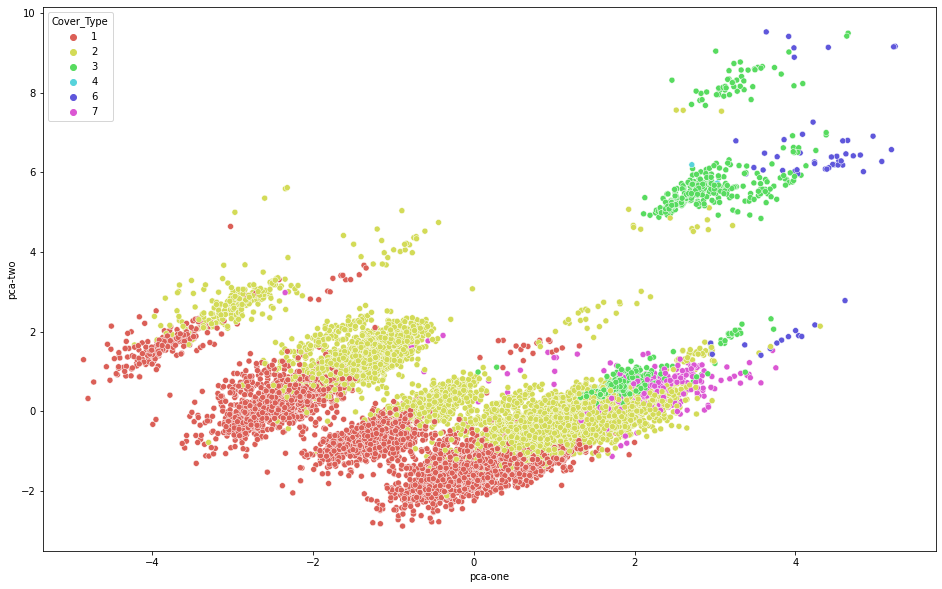

In [341]:
plt.figure(figsize=(16,10))
sns.scatterplot(data= df_plot,
                x= 'pca-one',
                y= 'pca-two',
                hue= 'Cover_Type',
                legend= 'full',
                palette=sns.color_palette("hls"))


**Q9:** Now we will plot all points from our dataframe ```df_plot``` Using result from T-SNE.

1. Use ```tsne-2d-one``` and ```tsne-2d-one``` column as X and Y axis respectively.
2. Use seaborn scatterplot for plotting the points.


```Note:``` Use the notebook from class 4/11 for data plotting. The link is provided below.

```Link:``` https://git.txstate.edu/ML/2022Spring/blob/master/project/Data_Viz_with_PCA_TSNE.ipynb

**A9** Fill the below cells. Use extra cells as per your necessary

<AxesSubplot:xlabel='tsne-2d-two', ylabel='tsne-2d-two'>

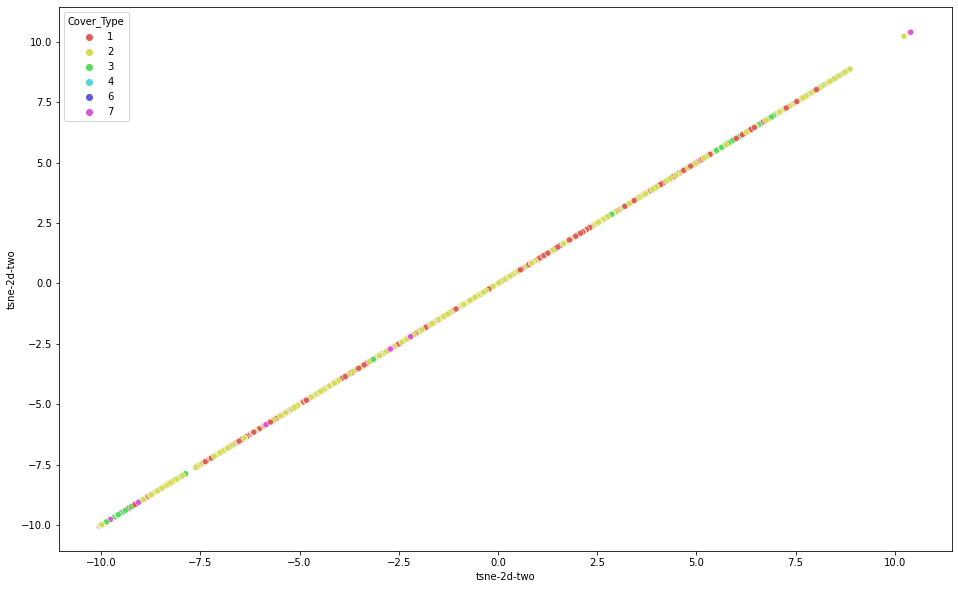

In [342]:
plt.figure(figsize=(16,10))
sns.scatterplot(data= df_plot,
                x= 'tsne-2d-two',
                y= 'tsne-2d-two',
                hue= 'Cover_Type',
                legend= 'full',
                palette=sns.color_palette("hls"))

## Part 2: Data Analysis and Classification Using Entire Dataset

**Q10:** Observe the data plotting and find the relation between datapoints and their characteristics.


1. Reduce the dimension of our ```Scaled_X``` dataframe to ```3``` using PCA algorithm.
2. Store the result into a variable named ```pca_result```
3. Create Train data and Test data using the pca_result and Y.

```Note:``` 
1. Consider pca_result as X values, and Y as y values.
2. You can use sklearn train_test_split
3. Keep Train and Test ratio as : 75%:25%

**A10** Fill the below cells. Use extra cells as per your necessary

In [343]:
pca = PCA(n_components= 3)
pca_result = pca.fit_transform(Scaled_X)

In [344]:
x_train,x_test,y_train,y_test = train_test_split(pca_result, y, train_size= .75)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 3) (60000,) (20000, 3) (20000,)


### Now, Select Three best model for our dataset. You have to decide three models which might work well with our dataset. 

**Q11** 

**Model Number 1** 

1. Reason behind choosing the model.
2. Create the model using sklearn or any proper library
3. Fit the model with the train data 
4. Get the score from the model using test data

**A11** Fill the below cells. Use extra cells as per your necessary

```Answer for Q.No:1 goes here```

Given the linearity of the graphs for PCA and TSNE, I think using a linear regression model will suffice in accurately representing the data. Using polynomial regression will also help since the data is in seperable chunks and might find a blend between the data

In [346]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures


#initiate the models
linearReg = linear_model.LinearRegression()
poly = PolynomialFeatures(degree= 4)

#fit the model
polyData= poly.fit_transform(x_train)
print(polyData.shape)
linearReg.fit(polyData, y_train)

#test the model
linearScore = cross_val_score(estimator= linearReg, X= polyData, y= y_train)
print(linearScore)
print(linearReg.score(polyData, y_train))

#test for non polynomial data
linearReg.fit(x_train, y_train)
print(linearReg.score(x_test, y_test))




(60000, 35)
[0.5575632  0.55140724 0.55096114 0.56701075 0.55427867]
0.5585186592565545
0.42989996110622786


RESULTS: 

Not good enough, score of 55% is too low

**Q12** 

**Model Number 2** 

1. Reason behind choosing the model.
2. Create the model using sklearn or any proper library
3. Fit the model with the train data 
4. Get the score from the model using test data

**A12** Fill the below cells. Use extra cells as per your necessaryReplace ??? with code in the code cell below

```Answer for Q.No:1 goes here```

SVM will be my next model of choice, since the linearity of the data doesnt help because they are in seperate clusters, maybe SVM can capitalize on the easily seperable data.




In [349]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#initiize the model
svc = SVC()
gridParams = [{'C': [0.01, 0.1, 5, 10, 100]}]

#fit the model
svc = GridSearchCV(svc, gridParams, scoring = 'accuracy', refit= True)
svc.fit(x_train, y_train)

#whats the best param?
print(svc.best_params_)

#test the model
print(svc.score(x_test, y_test))

{'C': 100}
0.9255


**Q13** 

**Model Number 3** 

1. Reason behind choosing the model.
2. Create the model using sklearn or any proper library
3. Fit the model with the train data 
4. Get the score from the model using test data

**A13** Fill the below cells. Use extra cells as per your necessary

```Answer for Q.No:1 goes here```
Since SVM already did very well considering the stark difference in score from Linear/poly regression and now, I will try Random Forest Tree Classifier due to it being a very well model and see how well it does with the data.



In [351]:
from sklearn.ensemble import RandomForestClassifier

#initialize the model
rand = RandomForestClassifier()

#fit the model
rand.fit(x_train, y_train)

#test the model
print(rand.score(x_test, y_test))

0.92435


**Q14** 


1. Plot a histogram using Y dataframe and display the per-class data distribution(number of rows per class).
2. Also print the number of rows per class as numeric value.

**A14** Fill the below cells. Use extra cells as per your necessary

<AxesSubplot:xlabel='Cover_Type', ylabel='Count'>

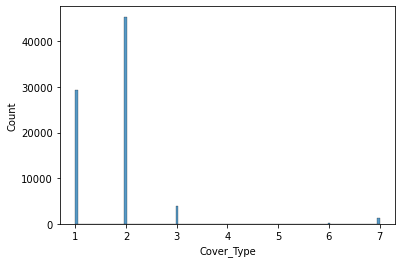

In [371]:
sns.histplot(data= y)

In [381]:
print(y.value_counts)

<bound method IndexOpsMixin.value_counts of 0        1
1        2
2        2
3        2
4        2
        ..
79995    2
79996    2
79997    1
79998    1
79999    1
Name: Cover_Type, Length: 80000, dtype: int64>


**Q15** 


1. From the histogram we can see that the dataset is highly imbalanced.
2. Use a proper dataset balancing technique to make the dataset balanced.
3. Plot a histogram using new y values and display the per-class data distribution(number of rows per class).

```Note:``` Use can use the ```imblearn.over_sampling``` library for this task. But use appropriate strategy for the method.

Follow the documentation for details: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

**A15** Fill the below cells. Use extra cells as per your necessary

In [385]:
from imblearn.over_sampling import SMOTE
balancer = SMOTE()
X_res, y_res= balancer.fit_resample(X= x, y= y)

<AxesSubplot:xlabel='Cover_Type', ylabel='Count'>

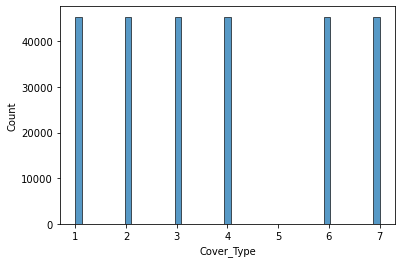

In [387]:
sns.histplot(data = y_res)

**Q16** 


1. Create new Train and Test data from the balaned X and Y value.
2. Keep Train and Test ratio as : 75%:25%

**A16** Fill the below cells. Use extra cells as per your necessary

In [389]:
x_train,x_test,y_train,y_test = train_test_split(X_res, y_res, train_size= .75)

**Q17**

### Now, Use the previously initialized three models and calculate the score from our new balanced dataset.



**Model Number 1** 

1. Fit the model with the new train data(Use the previous Model 1) 
2. Get the score from the model using  new test data

**A17** Fill the below cells. Use extra cells as per your necessary

In [394]:
#initiate the models
linearReg = linear_model.LinearRegression()

#fit the model
linearReg.fit(x_train, y_train)

#test the model
linearScore = cross_val_score(estimator= linearReg, X= x_train, y= y_train)
print(linearScore)
print(linearReg.score(x_test, y_test))

[1. 1. 1. 1. 1.]
1.0


Polynomial data was too large to complete, normal linear is fine. I do not understand the perfect score however

**Model Number 2** 

1. Fit the model with the new train data(Use the previous Model 2) 
2. Get the score from the model using  new test data

Fill the below cells. Use extra cells as per your necessary

In [395]:
#initiize the model
svc = SVC(C= 100)
#gridParams = [{'C': [0.01, 0.1, 5, 10, 100]}]

#fit the model
svc.fit(x_train, y_train)

#test the model        
print(svc.score(x_test, y_test))

0.9586576589807607


Chose best C score from previous model
No need to re-do grid search

**Model Number 3** 

1. Fit the model with the new train data(Use the previous Model 3) 
2. Get the score from the model using  new test data

Fill the below cells. Use extra cells as per your necessary

In [396]:
#initialize the model
rand = RandomForestClassifier()

#fit the model
rand.fit(x_train, y_train)

#test the model
print(rand.score(x_test, y_test))

0.9999853135555882


### After making the dataset balanced we can see a significant improve in the performence for all three models.